## NumPy模拟:正态随机漫步理论

In [3]:
# 使用内置random模块
import random
# random模块的normalvariate(mu,sigma)方法可以生成符合正态分布的随机数， 其中mu, sigma分别对应公式中的期望值μ, 标准差σ，当mu=0, sigma=1为标准正态分布
print("normalvariate: ",random.normalvariate(0,1))

normalvariate:  -0.7896725511134037


walk前10:[0.5914127598786401, -0.0935843137368795, 0.4538061551795134, -0.8322806835655449, 0.35054982179369404, 2.364235482611065, 0.05428208817167591, -0.20635206356967944, 0.18802511678, 0.3603701002597986]


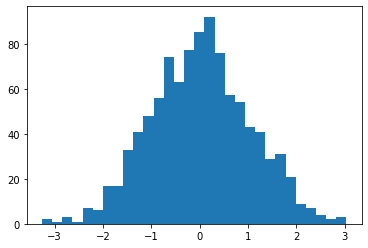

In [8]:
# 循环产生多个随机数，使用matplotlib绘制直方图
walk = []
for _ in range(1000):
    walk.append(random.normalvariate(0,1))
print(f"walk前10:{walk[:10]}")

import matplotlib.pyplot as plt
plt.hist(walk, bins=30) # bins直方图的柱数
plt.show()

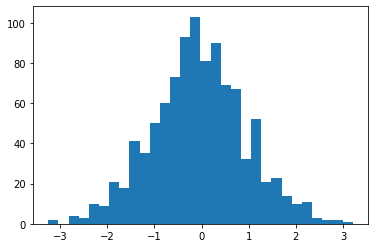

In [9]:
# 使用numpy的random模块
# loc、scale分别对应公式中的期望值μ，标准差σ，默认呈标准正态分布(μ=0,σ=1)，size指输出的值的数量，默认为None时只输出一个值
import numpy as np
import matplotlib.pyplot as plt#导入模块
plt.hist(np.random.normal(loc=0.0, scale=1.0, size=1000), bins=30)#bins直方图的柱数
plt.show()

In [12]:
# 矢量运算的能力
stock_data = np.random.normal(loc=10.0, scale=1.0, size=1000)
print("stock_data：\n {}".format(stock_data))

stock_data：
 [10.31171687 11.09938452 10.27989683 10.11903491  9.2448634   9.30882912
  9.66597067  8.59788129 10.79867811 10.04279709 11.07517245  9.0377445
  9.73748682 10.30413645  9.58944007 11.02570882 10.05663567 10.03074502
 11.17119216  9.25422802  8.80138178 10.59526004 10.92780441 10.73041498
  9.75214631 10.03873451 10.52167979  9.44441026  9.16774116 11.0925845
 10.92174512  9.90774942 10.03124452  9.90230959 10.06486143  9.44040388
 10.32076779 10.25117477  8.47396312 11.12183874 10.46997182  9.95657381
  9.34557726 10.28379404 10.31172567 10.04131006 11.26144103 11.55820022
 11.17540482 10.68541046  9.64279578  8.32823392  8.56771195  9.94562174
 10.91555779  8.76982221  9.83935689 10.49789944 11.95249158  9.54382158
  9.73868508 10.23825799 11.1725615   9.36730613 10.22060208  8.34379518
 10.09320126  8.991649    8.88586716 11.17188322  9.054979   10.78251711
 11.55196555  8.5595767   9.70845819 10.22029925  8.42183531  9.17445137
 10.07283474  9.71986396  9.86578394  8.

In [14]:
# 我们规整化所有浮点型随机数据的精度，以便于后续显示和运算。此处使用np.around()方法将所有数据保留2位小数，由于矢量运算的能力，此处仅需一行代码就可实现
stock_data = np.around(stock_data,2)#保留2位小数
print("stock_data：\n {}".format(stock_data))

stock_data：
 [10.31 11.1  10.28 10.12  9.24  9.31  9.67  8.6  10.8  10.04 11.08  9.04
  9.74 10.3   9.59 11.03 10.06 10.03 11.17  9.25  8.8  10.6  10.93 10.73
  9.75 10.04 10.52  9.44  9.17 11.09 10.92  9.91 10.03  9.9  10.06  9.44
 10.32 10.25  8.47 11.12 10.47  9.96  9.35 10.28 10.31 10.04 11.26 11.56
 11.18 10.69  9.64  8.33  8.57  9.95 10.92  8.77  9.84 10.5  11.95  9.54
  9.74 10.24 11.17  9.37 10.22  8.34 10.09  8.99  8.89 11.17  9.05 10.78
 11.55  8.56  9.71 10.22  8.42  9.17 10.07  9.72  9.87  8.82 10.31  8.76
 11.24 10.21 10.88  9.45  9.43  9.48  9.79  8.77 12.59 10.11 10.46  9.57
 10.55 10.26 11.69  9.79 11.84  9.    9.03 11.83 11.5  10.97  8.97 10.32
 10.17  8.82 10.83  9.53 10.75  9.94  9.09 10.12  8.29  9.79 10.67 11.44
  8.97 11.51  9.92  7.97  9.32 10.75  8.78  8.98  9.19  8.24 10.46  8.36
  9.41 10.   10.36 11.23  9.64 10.56 11.06  9.24  8.78 11.05 10.02 10.37
 11.61 10.43  9.46 11.5   9.77 10.72 10.49 10.71 11.94  9.65  9.29  8.97
  9.77  9.66  9.32 10.52 10.08 11.54  

In [15]:
# 算数运算：计算股价的涨跌幅 (今日收盘价-昨日收盘价)/昨日收盘价*100%
# np.roll()为循环右移，此处将今日收盘价数组循环右移一位得到了昨日收盘价数组，那么昨日收盘价数组第一个值为无效值，对应计算得到的pct_change的第一个值需要设置为无效值np.nan
pct_change = np.around((stock_data - np.roll(stock_data,1))/np.roll(stock_data,1),2)
pct_change[0] = np.nan
print("pct_change：\n {}".format(pct_change))

pct_change：
 [  nan  0.08 -0.07 -0.02 -0.09  0.01  0.04 -0.11  0.26 -0.07  0.1  -0.18
  0.08  0.06 -0.07  0.15 -0.09 -0.    0.11 -0.17 -0.05  0.2   0.03 -0.02
 -0.09  0.03  0.05 -0.1  -0.03  0.21 -0.02 -0.09  0.01 -0.01  0.02 -0.06
  0.09 -0.01 -0.17  0.31 -0.06 -0.05 -0.06  0.1   0.   -0.03  0.12  0.03
 -0.03 -0.04 -0.1  -0.14  0.03  0.16  0.1  -0.2   0.12  0.07  0.14 -0.2
  0.02  0.05  0.09 -0.16  0.09 -0.18  0.21 -0.11 -0.01  0.26 -0.19  0.19
  0.07 -0.26  0.13  0.05 -0.18  0.09  0.1  -0.03  0.02 -0.11  0.17 -0.15
  0.28 -0.09  0.07 -0.13 -0.    0.01  0.03 -0.1   0.44 -0.2   0.03 -0.09
  0.1  -0.03  0.14 -0.16  0.21 -0.24  0.    0.31 -0.03 -0.05 -0.18  0.15
 -0.01 -0.13  0.23 -0.12  0.13 -0.08 -0.09  0.11 -0.18  0.18  0.09  0.07
 -0.22  0.28 -0.14 -0.2   0.17  0.15 -0.18  0.02  0.02 -0.1   0.27 -0.2
  0.13  0.06  0.04  0.08 -0.14  0.1   0.05 -0.16 -0.05  0.26 -0.09  0.03
  0.12 -0.1  -0.09  0.22 -0.15  0.1  -0.02  0.02  0.11 -0.19 -0.04 -0.03
  0.09 -0.01 -0.04  0.13 -0.04  0.14 -0.

## Pandas构建DataFrame股票数据

In [18]:
import pandas as pd
#生成日时间序列
dd=pd.date_range('2019-01-01',freq='D',periods=1000)
print(f'生成日时间序列：\n{dd}')

生成日时间序列：
DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-05', '2019-01-06', '2019-01-07', '2019-01-08',
               '2019-01-09', '2019-01-10',
               ...
               '2021-09-17', '2021-09-18', '2021-09-19', '2021-09-20',
               '2021-09-21', '2021-09-22', '2021-09-23', '2021-09-24',
               '2021-09-25', '2021-09-26'],
              dtype='datetime64[ns]', length=1000, freq='D')


In [19]:
df_stock = pd.DataFrame({'close': stock_data, 'price range': pct_change}, index=dd)
print(f'股价交易数据：\n {df_stock.head()}')#打印前5行数据

股价交易数据：
             close  price range
2019-01-01  10.31          NaN
2019-01-02  11.10         0.08
2019-01-03  10.28        -0.07
2019-01-04  10.12        -0.02
2019-01-05   9.24        -0.09


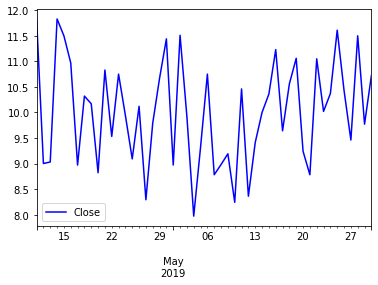

In [21]:
import matplotlib.pyplot as plt
# 绘制收盘价:50个交易日收盘价曲线,随机漫步的股价走势
df_stock.close[100:150].plot(c='b')
plt.legend(['Close'],loc='best')
plt.show()

## Matplotlib函数式绘图的方式

In [49]:
import numpy as np
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)

In [50]:
import matplotlib.pyplot as plt
# 创建图形并设置大小
plt.figure(figsize=(12, 8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

([<matplotlib.axis.YTick at 0x108791e80>,
 <a list of 3 Text yticklabel objects>)

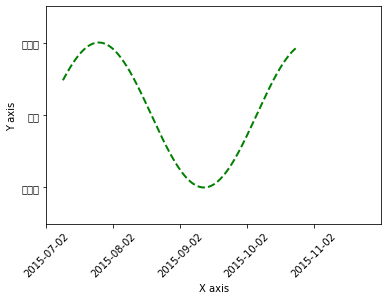

In [51]:
# lw：line width，用于设置线条宽度
# '--g'：结合linestyle和color，线条使用虚线，颜色使用绿色
# label：设置线条的标签为'sin(x)'
plt.plot(x, y, '--g', lw=2, label='sin(x)')
# 调整坐标轴刻度范围
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
# 设置轴标签
plt.xlabel('X axis')
plt.ylabel('Y axis')
# 设置坐标轴标签
plt.xticks(np.arange(0,10,2),['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                                        rotation=45)

# 中文解决方案
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号
# 
plt.yticks(np.arange(-1,1.5,1),[u'最小值',u'零值',u'最大值'])

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


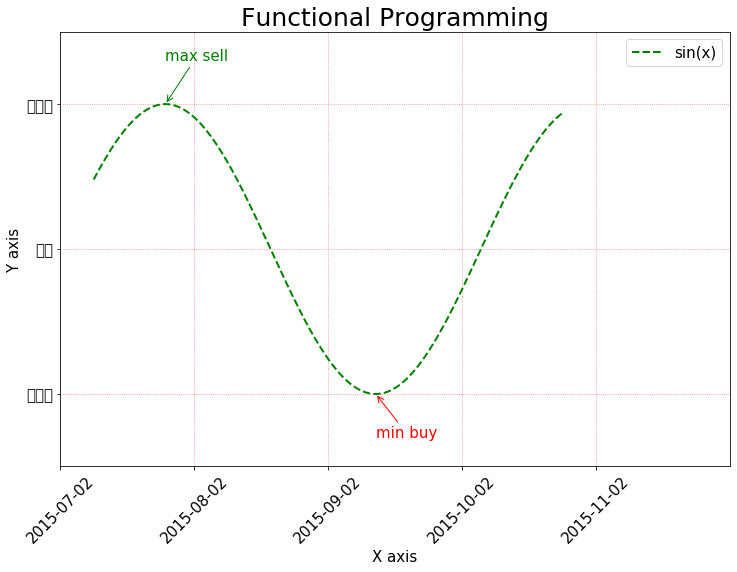

In [53]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)

#函数式绘图
# 创建图形并设置大小
plt.figure(figsize=(12, 8))

# sin(x)图
plt.plot(x, y, '--g', lw=2, label='sin(x)')

# 调整坐标轴范围
plt.xlim(0, 10)
plt.ylim(-1.5, 1.5)
# 设置坐标轴标签
plt.xticks(np.arange(0,10,2),['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                             rotation=45,fontsize=15)
plt.yticks(np.arange(-1,1.5,1),[u'最小值',u'零值',u'最大值'],fontsize=15)

# 设置轴标签
plt.xlabel('X axis',fontsize=15)
plt.ylabel('Y axis',fontsize=15)
# 设置网格线
plt.grid(True, ls=':', color='r', alpha=0.5)
# 设置标题
plt.title(u"Functional Programming",fontsize=25)
# 添加图例
plt.legend(loc='upper right',fontsize=15)

# 添加sin(x)的最高点注释
plt.annotate('max sell',
             xy = (np.pi/2, 1),#箭头指向点的坐标
             xytext = (np.pi/2, 1.3),#注释文本左端的坐标
             weight = 'regular',#注释文本的字体粗细风格，bold是粗体，regular是正常粗细
             color = 'g',#注释文本的颜色
             fontsize = 15,#注释文本的字体大小
             arrowprops = {
                 'arrowstyle': '->',#箭头类型
                 'connectionstyle': 'arc3',#连接类型
                 'color': 'g'#箭头颜色
             })

# 添加sin(x)的最低点注释
plt.annotate('min buy',
             xy = (np.pi*3/2, -1),
             xytext = (np.pi*3/2, -1.3),
             weight = 'regular',
             color = 'r',
             fontsize = 15,
             arrowprops = {
                 'arrowstyle': '->',
                 'connectionstyle': 'arc3',
                 'color': 'r'
             })
# 显示图形
plt.show()

## Matplotlib对象式绘图的方式

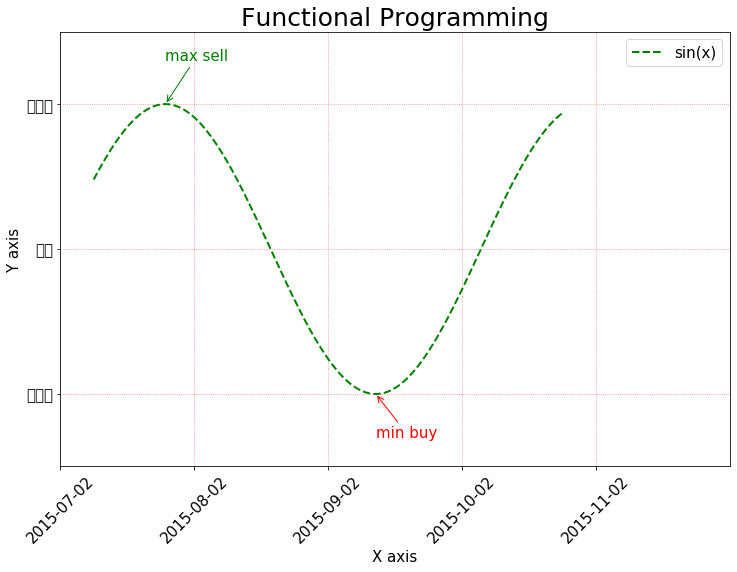

In [57]:
import matplotlib.pyplot as plt
import numpy as np

# 生成数据
x = np.linspace(0.5, 7.5, 1000)
y = np.sin(x)
#pyplot模块中的figure()函数创建名为fig的Figure对象
fig = plt.figure(figsize=(12, 8))
#在Figure对象中创建一个Axes对象，每个Axes对象即为一个绘图区域
ax = fig.add_subplot(111)
# sin(x)图
ax.plot(x, y, '--g', lw=2, label='sin(x)')

# 调整坐标轴范围
ax.set_xlim(0, 10)
ax.set_ylim(-1.5, 1.5)
# 设置坐标轴标签
ax.set_xticks(np.arange(0,10,2))
ax.set_yticks(np.arange(-1,1.5,1))
ax.set_xticklabels(['2015-07-02','2015-08-02','2015-09-02','2015-10-02','2015-11-02'],\
                             rotation=45,fontsize=15)
ax.set_yticklabels([u'最小值',u'零值',u'最大值'],fontsize=15)

# 设置轴标签
ax.set_xlabel('X axis',fontsize=15)
ax.set_ylabel('Y axis',fontsize=15)
# 设置网格线
ax.grid(True, ls=':', color='r', alpha=0.5)
# 设置标题
ax.set_title(u"Functional Programming",fontsize=25)
# 添加图例
ax.legend(loc='upper right',fontsize=15)

# 添加sin(x)的最高点注释
ax.annotate('max sell',
             xy = (np.pi/2, 1),#箭头指向点的坐标
             xytext = (np.pi/2, 1.3),#注释文本左端的坐标
             weight = 'regular',#注释文本的字体粗细风格，bold是粗体，regular是正常粗细
             color = 'g',#注释文本的颜色
             fontsize = 15,#注释文本的字体大小
             arrowprops = {
                 'arrowstyle': '->',#箭头类型
                 'connectionstyle': 'arc3',#连接类型
                 'color': 'g'#箭头颜色
             })

# 添加sin(x)的最低点注释
ax.annotate('min buy',
             xy = (np.pi*3/2, -1),
             xytext = (np.pi*3/2, -1.3),
             weight = 'regular',
             color = 'r',
             fontsize = 15,
             arrowprops = {
                 'arrowstyle': '->',
                 'connectionstyle': 'arc3',
                 'color': 'r'
             })
# 显示图形
plt.show()

## 差异化分析常用股票交易数据接口

In [59]:
!pip install pandas_datareader
import pandas_datareader.data as web

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
     |████████████████████████████████| 112kB 2.9MB/s eta 0:00:01


In [63]:
import pandas_datareader.data as web
import datetime
#获取上证指数的2017.1.1日至今的交易数据
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2017,1,1), datetime.date.today())

print(df_stockload.head())  # 查看前几行

                   High          Low         Open        Close    Volume  \
Date                                                                       
2017-01-03  3136.456055  3105.309082  3105.309082  3135.920898  141600.0   
2017-01-04  3160.103027  3130.114990  3133.787109  3158.793945  167900.0   
2017-01-05  3168.501953  3154.281006  3157.906006  3165.410889  174700.0   
2017-01-06  3172.034912  3153.024902  3163.775879  3154.321045  183700.0   
2017-01-09  3173.135986  3147.735107  3148.531982  3171.236084  171700.0   

              Adj Close  
Date                     
2017-01-03  3135.920898  
2017-01-04  3158.793945  
2017-01-05  3165.410889  
2017-01-06  3154.321045  
2017-01-09  3171.236084  


In [64]:
print(df_stockload.tail())  # 查看末尾几行

                   High          Low         Open        Close        Volume  \
Date                                                                           
2019-12-31  3051.677002  3030.511963  3036.385986  3050.124023  2.174000e+05   
2020-01-02  3098.100098  3066.335938  3066.335938  3085.197998  2.925000e+05   
2020-01-03  3093.819092  3074.518066  3089.021973  3083.785889  2.615000e+05   
2020-01-06  3107.202881  3065.309082  3070.908936  3083.407959  3.126000e+05   
2020-01-07  3105.450684  3084.329102  3085.488281  3104.801514  1.888507e+09   

              Adj Close  
Date                     
2019-12-31  3050.124023  
2020-01-02  3085.197998  
2020-01-03  3083.785889  
2020-01-06  3083.407959  
2020-01-07  3104.801514  


In [65]:
print (df_stockload.columns)#查看列索引信息

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [66]:
print (df_stockload.index)#查看行索引信息

DatetimeIndex(['2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
               '2017-01-09', '2017-01-10', '2017-01-11', '2017-01-12',
               '2017-01-13', '2017-01-16',
               ...
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', name='Date', length=732, freq=None)


In [67]:
print(df_stockload.shape)#查看形状

(732, 6)


In [68]:
print (df_stockload.describe())#查看各列数据描述性统计

              High          Low         Open        Close        Volume  \
count   732.000000   732.000000   732.000000   732.000000  7.320000e+02   
mean   3053.308844  3017.803169  3035.045554  3037.808777  2.763315e+06   
std     249.132672   252.553152   250.865055   251.425105  6.979449e+07   
min    2488.479004  2440.906982  2446.019043  2464.363037  8.820000e+04   
25%    2892.052307  2857.733337  2874.713257  2879.528992  1.370000e+05   
50%    3096.653442  3053.059570  3072.990601  3080.852051  1.637500e+05   
75%    3254.188904  3227.813293  3240.228333  3244.564697  2.081000e+05   
max    3587.031982  3534.195068  3563.639893  3559.465088  1.888507e+09   

         Adj Close  
count   732.000000  
mean   3037.808777  
std     251.425105  
min    2464.363037  
25%    2879.528992  
50%    3080.852051  
75%    3244.564697  
max    3559.465088  


In [69]:
print(df_stockload.info())#查看缺失及每列数据类型

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 732 entries, 2017-01-03 to 2020-01-07
Data columns (total 6 columns):
High         732 non-null float64
Low          732 non-null float64
Open         732 non-null float64
Close        732 non-null float64
Volume       732 non-null float64
Adj Close    732 non-null float64
dtypes: float64(6)
memory usage: 40.0 KB
None


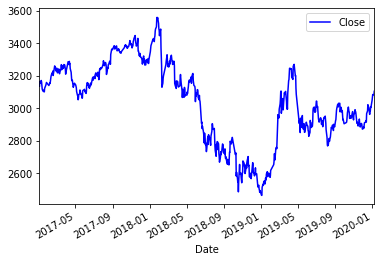

In [70]:
import matplotlib.pyplot as plt

#绘制收盘价
df_stockload.Close.plot(c='b')
plt.legend(['Close','30ave','60ave'],loc='best')
plt.show()

## Tushare 获取股票数据

In [71]:
import tushare as ts
df_sh=ts.get_hist_data('sh',start='2017-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.info())#查看交易数据概览信息

<class 'pandas.core.frame.DataFrame'>
Index: 611 entries, 2020-01-07 to 2017-07-10
Data columns (total 13 columns):
open            611 non-null float64
high            611 non-null float64
close           611 non-null float64
low             611 non-null float64
volume          611 non-null float64
price_change    611 non-null float64
p_change        611 non-null float64
ma5             611 non-null float64
ma10            611 non-null float64
ma20            611 non-null float64
v_ma5           611 non-null float64
v_ma10          611 non-null float64
v_ma20          611 non-null float64
dtypes: float64(13)
memory usage: 66.8+ KB
None


In [72]:
print(df_sh.axes)# 查看行和列的轴标签

[Index(['2020-01-07', '2020-01-06', '2020-01-03', '2020-01-02', '2019-12-31',
       '2019-12-30', '2019-12-27', '2019-12-26', '2019-12-25', '2019-12-24',
       ...
       '2017-07-21', '2017-07-20', '2017-07-19', '2017-07-18', '2017-07-17',
       '2017-07-14', '2017-07-13', '2017-07-12', '2017-07-11', '2017-07-10'],
      dtype='object', name='date', length=611), Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')]


In [73]:
df_sh.index = pd.to_datetime(df_sh.index)
df_sh.sort_index(inplace=True)
print(df_sh.axes)# 查看行和列的轴标签

[DatetimeIndex(['2017-07-10', '2017-07-11', '2017-07-12', '2017-07-13',
               '2017-07-14', '2017-07-17', '2017-07-18', '2017-07-19',
               '2017-07-20', '2017-07-21',
               ...
               '2019-12-24', '2019-12-25', '2019-12-26', '2019-12-27',
               '2019-12-30', '2019-12-31', '2020-01-02', '2020-01-03',
               '2020-01-06', '2020-01-07'],
              dtype='datetime64[ns]', name='date', length=611, freq=None), Index(['open', 'high', 'close', 'low', 'volume', 'price_change', 'p_change',
       'ma5', 'ma10', 'ma20', 'v_ma5', 'v_ma10', 'v_ma20'],
      dtype='object')]


In [75]:
#get_hist_data 未返回2008年数据
df_sh=ts.get_hist_data('sh',start='2018-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.head())

               open     high    close      low      volume  price_change  \
date                                                                       
2020-01-07  3085.49  3105.45  3104.80  3084.33  2765831.00         21.39   
2020-01-06  3070.91  3107.20  3083.41  3065.31  3125758.50         -0.38   
2020-01-03  3089.02  3093.82  3083.79  3074.52  2614966.75         -1.41   
2020-01-02  3066.34  3098.10  3085.20  3066.34  2924702.00         35.08   
2019-12-31  3036.39  3051.68  3050.12  3030.51  2174290.25         10.10   

            p_change       ma5      ma10      ma20       v_ma5      v_ma10  \
date                                                                         
2020-01-07      0.69  3081.464  3042.429  3007.901  2721109.70  2376848.85   
2020-01-06     -0.01  3068.508  3028.224  2998.385  2664076.55  2305982.36   
2020-01-03     -0.05  3052.834  3020.377  2989.815  2533130.40  2208482.26   
2020-01-02      1.15  3037.546  3013.705  2980.599  2375017.90  2155609.85   

In [76]:
print(df_sh.tail())

               open     high    close      low      volume  price_change  \
date                                                                       
2018-01-08  3391.55  3412.73  3409.48  3384.56  2361651.00         17.73   
2018-01-05  3386.46  3402.07  3391.75  3380.25  2130606.75          6.04   
2018-01-04  3371.00  3392.83  3385.71  3365.30  2069552.88         16.60   
2018-01-03  3347.74  3379.92  3369.11  3345.29  2138361.50         20.78   
2018-01-02  3314.03  3349.05  3348.33  3314.03  2022788.62         41.16   

            p_change       ma5      ma10      ma20       v_ma5      v_ma10  \
date                                                                         
2018-01-08      0.52  3380.876  3337.029  3314.206  2144592.15  1841257.61   
2018-01-05      0.18  3360.414  3325.787  3308.231  1955435.63  1729139.84   
2018-01-04      0.49  3341.340  3316.618  3302.246  1880057.63  1658207.09   
2018-01-03      0.62  3319.354  3306.808  3297.659  1791496.83  1588996.91   

In [77]:
#get_k_data 返回2008年数据
df_sh=ts.get_k_data('sh',start='2008-01-01',end=datetime.datetime.now().strftime('%Y-%m-%d'))
print(df_sh.head())

         date     open    close     high      low       volume code
0  2008-01-02  5265.00  5272.81  5295.02  5201.89   76566600.0   sh
1  2008-01-03  5269.80  5319.86  5321.46  5211.05   98510300.0   sh
2  2008-01-04  5328.41  5361.57  5372.46  5318.46   80875200.0   sh
3  2008-01-07  5357.45  5393.34  5403.35  5332.60   91933000.0   sh
4  2008-01-08  5414.56  5386.53  5480.07  5344.65  102478000.0   sh


In [78]:
print(df_sh.tail())

            date     open    close     high      low       volume code
2920  2019-12-31  3036.39  3050.12  3051.68  3030.51  217429022.0   sh
2921  2020-01-02  3066.34  3085.20  3098.10  3066.34  292470208.0   sh
2922  2020-01-03  3089.02  3083.79  3093.82  3074.52  261496667.0   sh
2923  2020-01-06  3070.91  3083.41  3107.20  3065.31  312575842.0   sh
2924  2020-01-07  3085.49  3104.80  3105.45  3084.33  276583111.0   sh


In [79]:
df_sh.index = pd.to_datetime(df_sh.date)
df_sh.drop(axis=1, columns='date', inplace=True)
print(df_sh.head())

               open    close     high      low       volume code
date                                                            
2008-01-02  5265.00  5272.81  5295.02  5201.89   76566600.0   sh
2008-01-03  5269.80  5319.86  5321.46  5211.05   98510300.0   sh
2008-01-04  5328.41  5361.57  5372.46  5318.46   80875200.0   sh
2008-01-07  5357.45  5393.34  5403.35  5332.60   91933000.0   sh
2008-01-08  5414.56  5386.53  5480.07  5344.65  102478000.0   sh


In [81]:
# 使用Pro版本
#设置token
import os
token=os.getenv("TUSHARE_TOKEN")
pro = ts.pro_api(token)#初始化pro接口
#获取平安银行日行情数据
pa=pro.daily(ts_code='000001.SZ', start_date='20180101',
               end_date='20190101')

print(pa.head())

     ts_code trade_date  open  high   low  close  pre_close  change  pct_chg  \
0  000001.SZ   20181228  9.31  9.46  9.31   9.38       9.28    0.10   1.0776   
1  000001.SZ   20181227  9.45  9.49  9.28   9.28       9.30   -0.02  -0.2151   
2  000001.SZ   20181226  9.35  9.42  9.27   9.30       9.34   -0.04  -0.4283   
3  000001.SZ   20181225  9.29  9.43  9.21   9.34       9.42   -0.08  -0.8493   
4  000001.SZ   20181224  9.40  9.45  9.31   9.42       9.45   -0.03  -0.3175   

         vol      amount  
0  576604.00  541571.004  
1  624593.27  586343.755  
2  421140.60  393215.140  
3  586615.45  545235.607  
4  509117.67  477186.904  


In [82]:
pa.trade_date = pd.DatetimeIndex(pa.trade_date)
pa.set_index("trade_date", drop=True, inplace=True)
print(pa.axes)

[DatetimeIndex(['2018-12-28', '2018-12-27', '2018-12-26', '2018-12-25',
               '2018-12-24', '2018-12-21', '2018-12-20', '2018-12-19',
               '2018-12-18', '2018-12-17',
               ...
               '2018-01-15', '2018-01-12', '2018-01-11', '2018-01-10',
               '2018-01-09', '2018-01-08', '2018-01-05', '2018-01-04',
               '2018-01-03', '2018-01-02'],
              dtype='datetime64[ns]', name='trade_date', length=243, freq=None), Index(['ts_code', 'open', 'high', 'low', 'close', 'pre_close', 'change',
       'pct_chg', 'vol', 'amount'],
      dtype='object')]


In [83]:
print(pa.head())

              ts_code  open  high   low  close  pre_close  change  pct_chg  \
trade_date                                                                   
2018-12-28  000001.SZ  9.31  9.46  9.31   9.38       9.28    0.10   1.0776   
2018-12-27  000001.SZ  9.45  9.49  9.28   9.28       9.30   -0.02  -0.2151   
2018-12-26  000001.SZ  9.35  9.42  9.27   9.30       9.34   -0.04  -0.4283   
2018-12-25  000001.SZ  9.29  9.43  9.21   9.34       9.42   -0.08  -0.8493   
2018-12-24  000001.SZ  9.40  9.45  9.31   9.42       9.45   -0.03  -0.3175   

                  vol      amount  
trade_date                         
2018-12-28  576604.00  541571.004  
2018-12-27  624593.27  586343.755  
2018-12-26  421140.60  393215.140  
2018-12-25  586615.45  545235.607  
2018-12-24  509117.67  477186.904  


##  全方位访问DataFrame格式股票数据

In [10]:
import pandas_datareader.data as web
import datetime
# 获取上证指数交易数据 pandas-datareade模块data.DataReader()方法
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2019, 1, 1), datetime.datetime(2019, 2, 1))

df_stockload.head(10)  # 查看前几行

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,2500.278076,2456.423096,2497.881104,2465.291016,109900,2465.291016
2019-01-03,2488.479004,2455.926025,2461.782959,2464.363037,124400,2464.363037
2019-01-04,2515.315918,2440.906982,2446.019043,2514.867920,168900,2514.867920
2019-01-07,2536.978027,2515.508057,2528.698975,2533.089111,177300,2533.089111
2019-01-08,2531.344971,2520.165039,2530.300049,2526.461914,158100,2526.461914
2019-01-09,2574.407959,2536.156982,2536.416992,2544.344971,191900,2544.344971
2019-01-10,2551.825928,2531.664062,2543.853027,2535.099121,159900,2535.099121
2019-01-11,2554.787109,2533.358887,2539.549072,2553.831055,149400,2553.831055
2019-01-14,2556.293945,2533.010010,2553.327881,2535.764893,144800,2535.764893


## 行/列索引访问

In [11]:

print(df_stockload.index)  # 查看索引

DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [12]:
print(df_stockload.columns)  # 查看列名

Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')


In [13]:
print(df_stockload.axes)  # 查看行和列的轴标签 等价于df_stockload.index和df_stockload.columns

[DatetimeIndex(['2019-01-02', '2019-01-03', '2019-01-04', '2019-01-07',
               '2019-01-08', '2019-01-09', '2019-01-10', '2019-01-11',
               '2019-01-14', '2019-01-15', '2019-01-16', '2019-01-17',
               '2019-01-18', '2019-01-21', '2019-01-22', '2019-01-23',
               '2019-01-24', '2019-01-25', '2019-01-28', '2019-01-29',
               '2019-01-30', '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', name='Date', freq=None), Index(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')]


## 行/列元素访问

In [18]:
print(df_stockload.values) # 访问全部元素数值
print(type(df_stockload.values))  

[[  2500.27807617   2456.4230957    2497.88110352   2465.29101562
  109900.           2465.29101562]
 [  2488.47900391   2455.92602539   2461.78295898   2464.36303711
  124400.           2464.36303711]
 [  2515.31591797   2440.90698242   2446.01904297   2514.86791992
  168900.           2514.86791992]
 [  2536.97802734   2515.50805664   2528.69897461   2533.08911133
  177300.           2533.08911133]
 [  2531.3449707    2520.16503906   2530.30004883   2526.46191406
  158100.           2526.46191406]
 [  2574.40795898   2536.15698242   2536.41699219   2544.3449707
  191900.           2544.3449707 ]
 [  2551.82592773   2531.6640625    2543.85302734   2535.09912109
  159900.           2535.09912109]
 [  2554.78710938   2533.35888672   2539.54907227   2553.83105469
  149400.           2553.83105469]
 [  2556.29394531   2533.01000977   2553.32788086   2535.76489258
  144800.           2535.76489258]
 [  2571.50195312   2532.43310547   2537.37011719   2570.3449707
  160300.           2570.34

In [19]:
print(df_stockload['Open']) #print(df_stockload.Open)
print(type(df_stockload['Open'])) #查看列类型

Date
2019-01-02    2497.881104
2019-01-03    2461.782959
2019-01-04    2446.019043
2019-01-07    2528.698975
2019-01-08    2530.300049
2019-01-09    2536.416992
2019-01-10    2543.853027
2019-01-11    2539.549072
2019-01-14    2553.327881
2019-01-15    2537.370117
2019-01-16    2569.070068
2019-01-17    2573.575928
2019-01-18    2567.739014
2019-01-21    2599.058105
2019-01-22    2609.642090
2019-01-23    2575.258057
2019-01-24    2584.647949
2019-01-25    2596.261963
2019-01-28    2615.711914
2019-01-29    2592.354980
2019-01-30    2584.746094
2019-01-31    2581.332031
2019-02-01    2597.778076
Name: Open, dtype: float64
<class 'pandas.core.series.Series'>


In [20]:
print(df_stockload[0:1])
print(type(df_stockload[0:1])) #查看行类型

                   High          Low         Open        Close  Volume  \
Date                                                                     
2019-01-02  2500.278076  2456.423096  2497.881104  2465.291016  109900   

              Adj Close  
Date                     
2019-01-02  2465.291016  
<class 'pandas.core.frame.DataFrame'>


## 元素级的访问

In [22]:
print(df_stockload.loc['2019-01-02'])

High           2500.278076
Low            2456.423096
Open           2497.881104
Close          2465.291016
Volume       109900.000000
Adj Close      2465.291016
Name: 2019-01-02 00:00:00, dtype: float64


In [23]:
print(df_stockload.loc['2019-01-02',['High','Low']])

High    2500.278076
Low     2456.423096
Name: 2019-01-02 00:00:00, dtype: float64


In [24]:
print(df_stockload.iloc[0:2,0:1])

                   High
Date                   
2019-01-02  2500.278076
2019-01-03  2488.479004


In [25]:
print(df_stockload.iloc[0:2])

                   High          Low         Open        Close  Volume  \
Date                                                                     
2019-01-02  2500.278076  2456.423096  2497.881104  2465.291016  109900   
2019-01-03  2488.479004  2455.926025  2461.782959  2464.363037  124400   

              Adj Close  
Date                     
2019-01-02  2465.291016  
2019-01-03  2464.363037  


In [26]:
print(df_stockload.iloc[[0,2],[0,1]])

                   High          Low
Date                                
2019-01-02  2500.278076  2456.423096
2019-01-04  2515.315918  2440.906982


In [27]:
# ix方法被弃用
print(df_stockload.ix[[0, 2], 'High'])

Date
2019-01-02    2500.278076
2019-01-04    2515.315918
Name: High, dtype: float64


/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  
/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/pandas/core/indexing.py:961: FutureWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ix-indexer-is-deprecated
  return getattr(section, self.name)[new_key]


In [30]:
print(df_stockload.loc[df_stockload.index[[0, 2]], 'High'])

Date
2019-01-02    2500.278076
2019-01-04    2515.315918
Name: High, dtype: float64


In [31]:
print(df_stockload.index[[0, 2]])

DatetimeIndex(['2019-01-02', '2019-01-04'], dtype='datetime64[ns]', name='Date', freq=None)


In [32]:
print(df_stockload.iloc[[0, 2], df_stockload.columns.get_loc('High')])

Date
2019-01-02    2500.278076
2019-01-04    2515.315918
Name: High, dtype: float64


In [33]:
print(df_stockload.iloc[[0, 2], df_stockload.columns.get_indexer(['High', 'Open'])])

                   High         Open
Date                                
2019-01-02  2500.278076  2497.881104
2019-01-04  2515.315918  2446.019043


In [37]:
import pandas as pd
print(df_stockload.loc[[pd.to_datetime('2019-01-02'), pd.to_datetime('2019-01-04')], ['High','Open']])

                   High         Open
Date                                
2019-01-02  2500.278076  2497.881104
2019-01-04  2515.315918  2446.019043


# 股票数据分析：遍历DataFrame格式股票数据的方法

单均线突破的交易策略为：若昨日收盘价高出过去20日平均价则今天开盘即买入股票；若昨日收盘价低于过去20日平均价，那么今天开盘卖出股票。

## 例程数据准备

In [40]:
# 获取上证指数交易数据 pandas-datareade模块data.DataReader()方法
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
# python3.7打印
print(df_stockload.head(10))  # 查看前10行

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-02  3349.052979  3314.031006  3314.031006  3348.325928  202300   
2018-01-03  3379.915039  3345.289062  3347.742920  3369.107910  213800   
2018-01-04  3392.825928  3365.294922  3371.000000  3385.709961  207000   
2018-01-05  3402.069092  3380.245117  3386.464111  3391.750000  213100   
2018-01-08  3412.730957  3384.559082  3391.552979  3409.479980  236200   
2018-01-09  3417.228027  3403.586914  3406.112061  3413.899902  191500   
2018-01-10  3430.214111  3398.842041  3414.113037  3421.833984  209100   
2018-01-11  3426.482910  3405.638916  3415.584961  3425.344971  173800   
2018-01-12  3435.424072  3417.979980  3423.878906  3428.940918  174100   
2018-01-15  3442.500977  3402.312012  3428.950928  3410.488037  232000   

              Adj Close  
Date                     
2018-01-02  3348.325928  
2018-01-03  3369.107910  
2018-01

In [43]:
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#增加M20移动平均线
print(df_stockload.head())  # 查看前5行
print(df_stockload.tail())  # 查看末5行

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-02  3349.052979  3314.031006  3314.031006  3348.325928  202300   
2018-01-03  3379.915039  3345.289062  3347.742920  3369.107910  213800   
2018-01-04  3392.825928  3365.294922  3371.000000  3385.709961  207000   
2018-01-05  3402.069092  3380.245117  3386.464111  3391.750000  213100   
2018-01-08  3412.730957  3384.559082  3391.552979  3409.479980  236200   

              Adj Close  Ma20  
Date                           
2018-01-02  3348.325928   NaN  
2018-01-03  3369.107910   NaN  
2018-01-04  3385.709961   NaN  
2018-01-05  3391.750000   NaN  
2018-01-08  3409.479980   NaN  
                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-12-25  2513.964111  2462.844971  2503.949951  2504.819092  136500   
2018-12-26  2513.825928  2492.07592

In [44]:
df_stockload.dropna(axis=0,how='any',inplace=True)#NAN值删除
print(df_stockload.head())  # 查看前5行

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  
Date                                  
2018-01-29  3523.000977  3454.276660  
2018-01-30  3488.009033  3461.260815  
2018-01-31  3480.833008  3466.847070  
2018-02-01  3446.979980  3469.910571  
2018-02-02  3462.081055  3473.427124  


## for..in循环方式

In [50]:
# 模拟迭代，迭代器和可迭代对象
# 迭代的过程
x = [1,2,3]
its = x.__iter__() #列表是可迭代对象，否则会提示不是迭代对象
print(its)

print(next(its)) # its包含此方法，说明its是迭代器

print(next(its)) 

print(next(its)) 

print(next(its)) 


1
2
3


StopIteration: 

In [52]:
import numpy as np
def forin_looping(df):
    df['signal'] = 0 #df = df.assign(signal = 0)  #可采用assign新增一列
    for i in np.arange(0,df.shape[0]):
        df.iloc[i,df.columns.get_loc('signal')] = np.sign(df.iloc[i]['Close'] - df.iloc[i]['Ma20'])
    return df
print(forin_looping(df_stockload)[0:5])

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  signal  
Date                                          
2018-01-29  3523.000977  3454.276660     1.0  
2018-01-30  3488.009033  3461.260815     1.0  
2018-01-31  3480.833008  3466.847070     1.0  
2018-02-01  3446.979980  3469.910571    -1.0  
2018-02-02  3462.081055  3473.427124    -1.0  


## iterrows()生成器方式

In [53]:
# 生成器函数方式实现生成器
def gensquares(N):
	for i in range(N):
		yield i**2 
        
print(gensquares(5))

<generator object gensquares at 0x106a7e228>


In [54]:
for i in gensquares(5):
	print(i) 

0
1
4
9
16


In [55]:
# 生成器表达式方式实现生成器
print(x**2 for x in range(5))

<generator object <genexpr> at 0x106a7e228>


In [56]:
print(list(x**2 for x in range(5)))

[0, 1, 4, 9, 16]


In [57]:
#iterrows()遍历方式
def iterrows_loopiter(df):
    df['signal'] = 0 #df = df.assign(signal = 0)  #可采用assign新增一列
    for index,row in df.iterrows():
        df.loc[index, 'signal'] = np.sign(row['Close']-row['Ma20'])
    return df
print(iterrows_loopiter(df_stockload)[0:5])

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  signal  
Date                                          
2018-01-29  3523.000977  3454.276660     1.0  
2018-01-30  3488.009033  3461.260815     1.0  
2018-01-31  3480.833008  3466.847070     1.0  
2018-02-01  3446.979980  3469.910571    -1.0  
2018-02-02  3462.081055  3473.427124    -1.0  


## apply()循环方式

In [60]:
df_stockload['signal'] = df_stockload.apply(lambda row: (np.sign(row['Close']-row['Ma20'])), axis = 1)
print(df_stockload.head())

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  signal  
Date                                          
2018-01-29  3523.000977  3454.276660     1.0  
2018-01-30  3488.009033  3461.260815     1.0  
2018-01-31  3480.833008  3466.847070     1.0  
2018-02-01  3446.979980  3469.910571    -1.0  
2018-02-02  3462.081055  3473.427124    -1.0  


## 矢量化遍历方式

In [61]:
#Pandas series 的矢量化方式
df_stockload['signal'] = np.sign(df_stockload['Close']-df_stockload['Ma20'])
print(df_stockload.head())

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  signal  
Date                                          
2018-01-29  3523.000977  3454.276660     1.0  
2018-01-30  3488.009033  3461.260815     1.0  
2018-01-31  3480.833008  3466.847070     1.0  
2018-02-01  3446.979980  3469.910571    -1.0  
2018-02-02  3462.081055  3473.427124    -1.0  


In [62]:
#Numpy arrays的矢量化方式
df_stockload['signal'] = np.sign(df_stockload['Close'].values-df_stockload['Ma20'].values)
print(df_stockload.head())

                   High          Low         Open        Close  Volume  \
Date                                                                     
2018-01-29  3587.031982  3510.269043  3563.639893  3523.000977  236000   
2018-01-30  3523.051025  3484.656006  3511.500977  3488.009033  186400   
2018-01-31  3495.452881  3454.726074  3470.509033  3480.833008  207300   
2018-02-01  3495.093018  3424.418945  3478.669922  3446.979980  260500   
2018-02-02  3463.164062  3388.860107  3419.225098  3462.081055  208100   

              Adj Close         Ma20  signal  
Date                                          
2018-01-29  3523.000977  3454.276660     1.0  
2018-01-30  3488.009033  3461.260815     1.0  
2018-01-31  3480.833008  3466.847070     1.0  
2018-02-01  3446.979980  3469.910571    -1.0  
2018-02-02  3462.081055  3473.427124    -1.0  


## 执行效率对比

In [67]:
#使用timeit方法对比方法参考例程如下，需要import timeit模块：
from timeit import timeit
def test1():
    forin_looping(df_stockload)
def test2():
    iterrows_loopiter(df_stockload)
def test3():
    df_stockload['signal'] = df_stockload.apply(lambda row: (np.sign(row['Close'] - row['Ma20'])), axis=1)
def test4():
    df_stockload['signal'] = np.sign(df_stockload['Close']-df_stockload['Ma20'])
def test5():
    df_stockload['signal'] = np.sign(df_stockload['Close'].values - df_stockload['Ma20'].values)

#for..in循环迭代方式
t1 = timeit('test1()', 'from __main__ import test1', number=100)
#iterrows()遍历方式
t2 = timeit('test2()', 'from __main__ import test2', number=100)
#apply()方法循环方式
t3 = timeit('test3()', 'from __main__ import test3', number=100)
#Pandas series 的矢量化方式
t4 = timeit('test4()', 'from __main__ import test4', number=100)
#Numpy arrays的矢量化方式：
t5 = timeit('test5()', 'from __main__ import test5', number=100)

print(t1,t2,t3,t4,t5)

‘’‘
loop: 14.943235208999998
iterrows: 8.826773373
apply: 0.5511994379999999
pandas series: 0.02216327200000117 
numpy array: 0.012934390000001768
’‘’

SyntaxError: invalid character in identifier (<ipython-input-67-5a70207eaea4>, line 27)

# 股票数据分析：爬虫方式获取行业板块数据

<class 'http.client.HTTPResponse'>
<!DOCTYPE html>              <!--STATUS OK-->  <head>   <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/> <meta name="description" content="百度图片使用世界前沿的人工智能技术，为用户甄选海量的高清美图，用更流畅、更快捷、更精准的搜索体验，带你去发现多彩的世界。"> <meta http-equiv="X-UA-Compatible" content="IE=Edge"/> <meta name="baidu-site-verification" content="2ltGWMzql9"/>  <script>
    var bdimgdata = {
        logid: '13210685411412363987',
        sid: 'de3161b3fcf470def5036d1bdbc56cdd2e3677dd',
        wh: window.screen.width + 'x' + window.screen.height,
        sampid: '-1',
        protocol: window.location.protocol.replace(':', ''),
        spat: 0 + '-' + ''
    }
</script> <script>!function(n){var i={},t="//imgstat.baidu.com/17.gif",a=+new Date,d=function(n){var i=[];for(var t in n)i.push(t+"="+n[t]);return i.join("&")},e=function(n){return n.etype="speed",n.page="index",n.logid=bdimgdata.logid,n.sid=bdimgdata.sid,n.wh=bdimgdata.wh,n.sampid=bdimgdata.sampid,n.app="index",n.spat=b
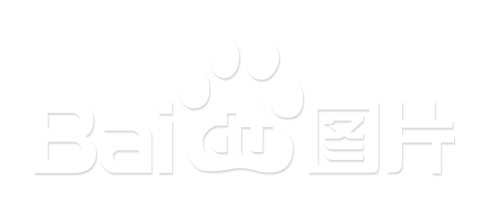

In [70]:
from urllib import request
resp = request.urlopen("http://image.baidu.com/")
print(type(resp))
print(resp.read().decode())

<class 'urllib3.response.HTTPResponse'>
['CONTENT_DECODERS', 'DECODER_ERROR_CLASSES', 'REDIRECT_STATUSES', '__abstractmethods__', '__class__', '__del__', '__delattr__', '__dict__', '__dir__', '__doc__', '__enter__', '__eq__', '__exit__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__next__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '_abc_impl', '_body', '_checkClosed', '_checkReadable', '_checkSeekable', '_checkWritable', '_connection', '_decode', '_decoder', '_error_catcher', '_flush_decoder', '_fp', '_fp_bytes_read', '_handle_chunk', '_init_decoder', '_init_length', '_original_response', '_pool', '_request_url', '_update_chunk_length', 'auto_close', 'chunk_left', 'chunked', 'close', 'closed', 'connection', 'data', 'decode_content', 'enforce_content_length', 'fileno', 'flush', 'from_httplib', 'get_redir
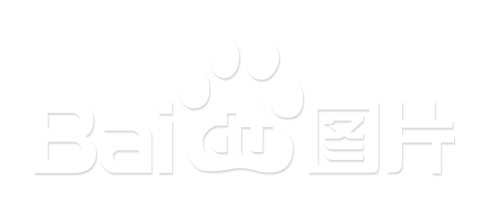

In [72]:
import urllib3
http = urllib3.PoolManager()
resp_dat = http.request('GET', "http://image.baidu.com/")
print(type(resp_dat))
print(dir(resp_dat))
print(resp_dat.data.decode())

In [73]:
#访问行业板块数据
http = urllib3.PoolManager();
pages = 4
for p in range(1,pages+1):
    url = "http://nufm.dfcfw.com/EM_Finance2014NumericApplication/JS.aspx?cb=jQuery1124012582582823807198_1554554782636&type=CT&token=4f1862fc3b5e77c150a2b985b12db0fd&sty=FPGBKI&js=({data:[(x)],recordsFiltered:(tot)})&cmd=C._BKHY&st=(ChangePercent)&sr=-1&p=%d"%p
    url += "&ps=20&_=1554554783027"
    try:
        resp_dat = http.request('GET', url)
        print(resp_dat.data.decode())
    except Exception as e:
        print(resp_dat.status)
        print(e)

jQuery1124012582582823807198_1554554782636({data:["1,BK0459,电子元件,2.22,3723418133542,3.40,193|5|36|3,603936,1,博敏电子,23.17,10.02,002684,2,*ST猛狮,5.20,-4.94,2,14414.15,312.62","1,BK0537,材料行业,2.04,757673268882,2.52,67|3|13|1,688299,1,长阳科技,21.94,11.88,300325,2,德威新材,3.43,-1.72,2,18651.95,373.21","1,BK0481,汽车行业,1.91,2031795783737,1.74,125|7|17|0,002666,2,德联集团,6.13,10.05,603178,1,圣龙股份,16.60,-6.90,2,17274.26,322.92","1,BK0736,电信运营,1.67,243034330886,0.97,4|1|0|0,300383,2,光环新网,21.82,3.51,600050,1,中国联通,5.91,0.00,2,1093.86,18.02","1,BK0910,专用设备,1.62,825785644878,2.22,95|1|26|0,688012,1,中微公司,134.00,16.02,002890,2,弘宇股份,27.58,-2.02,2,1274.19,20.30","1,BK0473,券商信托,1.50,2840944851405,1.31,39|1|2|1,601236,1,红塔证券,17.68,10.02,600864,1,哈投股份,7.59,-5.48,2,124750.68,1844.48","1,BK0538,化工行业,1.50,1615419156731,1.65,148|12|38|1,002971,2,N和远,15.58,43.99,603879,1,永悦科技,9.90,-7.56,2,13615.52,201.35","1,BK0737,软件服务,1.48,2348576409123,3.75,154|4|24|0,300603,2,立昂技术,23.05,10.02,600455,1,博通股份,39.02,-10.01,2,826.90,12.04","1

In [75]:
import re
#访问行业板块数据
http = urllib3.PoolManager();

pages = 4
conts = []
for p in range(1,pages+1):
    url = "http://nufm.dfcfw.com/EM_Finance2014NumericApplication/JS.aspx?cb=jQuery1124012582582823807198_1554554782636&type=CT&token=4f1862fc3b5e77c150a2b985b12db0fd&sty=FPGBKI&js=({data:[(x)],recordsFiltered:(tot)})&cmd=C._BKHY&st=(ChangePercent)&sr=-1&p=%d"%p
    url += "&ps=20&_=1554554783027"
    try:
        resp_dat = http.request('GET', url)
        pattern = re.compile(r'BK(.*?)"')
        bk_list = re.findall(pattern,resp_dat.data.decode())
        for bk in bk_list:
            conts.append(bk)
        print(resp_dat.data.decode())
    except Exception as e:
        print(resp_dat.status)
        print(e)

print(conts)

jQuery1124012582582823807198_1554554782636({data:["1,BK0459,电子元件,2.22,3723418133542,3.40,193|5|36|3,603936,1,博敏电子,23.17,10.02,002684,2,*ST猛狮,5.20,-4.94,2,14414.15,312.62","1,BK0537,材料行业,2.04,757673268882,2.52,67|3|13|1,688299,1,长阳科技,21.94,11.88,300325,2,德威新材,3.43,-1.72,2,18651.95,373.21","1,BK0481,汽车行业,1.91,2031795783737,1.74,125|7|17|0,002666,2,德联集团,6.13,10.05,603178,1,圣龙股份,16.60,-6.90,2,17274.26,322.92","1,BK0736,电信运营,1.67,243034330886,0.97,4|1|0|0,300383,2,光环新网,21.82,3.51,600050,1,中国联通,5.91,0.00,2,1093.86,18.02","1,BK0910,专用设备,1.62,825785644878,2.22,95|1|26|0,688012,1,中微公司,134.00,16.02,002890,2,弘宇股份,27.58,-2.02,2,1274.19,20.30","1,BK0473,券商信托,1.50,2840944851405,1.31,39|1|2|1,601236,1,红塔证券,17.68,10.02,600864,1,哈投股份,7.59,-5.48,2,124750.68,1844.48","1,BK0538,化工行业,1.50,1615419156731,1.65,148|12|38|1,002971,2,N和远,15.58,43.99,603879,1,永悦科技,9.90,-7.56,2,13615.52,201.35","1,BK0737,软件服务,1.48,2348576409123,3.75,154|4|24|0,300603,2,立昂技术,23.05,10.02,600455,1,博通股份,39.02,-10.01,2,826.90,12.04","1

In [76]:
df = pd.DataFrame(np.zeros((len(conts), 7)), columns=[u'板块名称', u'BK涨跌幅', u'总市值', u'换手率', u'涨跌家数', u'领涨股票', u'SK涨跌幅'])

In [78]:
for num, bk_dat in enumerate(conts) :
    bk_dat = bk_dat.split(',')
    df.loc[df.index[num], u'板块名称'] = bk_dat[1]
    df.loc[df.index[num], u'BK涨跌幅'] = bk_dat[2]
    df.loc[df.index[num], u'总市值'] = bk_dat[3]
    df.loc[df.index[num], u'换手率'] = bk_dat[4]
    df.loc[df.index[num], u'涨跌家数'] = bk_dat[5]
    df.loc[df.index[num], u'领涨股票'] = bk_dat[8]
    df.loc[df.index[num], u'SK涨跌幅'] = bk_dat[10]
print(df)

    板块名称  BK涨跌幅            总市值   换手率        涨跌家数  领涨股票  SK涨跌幅
0   电子元件   2.22  3723418133542  3.40  193|5|36|3  博敏电子  10.02
1   材料行业   2.04   757673268882  2.52   67|3|13|1  长阳科技  11.88
2   汽车行业   1.91  2031795783737  1.74  125|7|17|0  德联集团  10.05
3   电信运营   1.67   243034330886  0.97     4|1|0|0  光环新网   3.51
4   专用设备   1.62   825785644878  2.22   95|1|26|0  中微公司  16.02
..   ...    ...            ...   ...         ...   ...    ...
56  水泥建材  -0.01   734466714462  1.42   23|2|20|0  福建水泥   8.00
57  园林工程  -0.03    85057051101  1.32    10|4|8|2  农尚环境   5.32
58  港口水运  -0.04   683504161467  0.40   17|4|11|0  淮河能源   1.52
59  船舶制造  -0.40   218617944009  0.68     3|1|7|0  瑞特股份   0.78
60   贵金属  -0.64   321149532901  1.58    2|0|12|0  贵研铂业   2.00

[61 rows x 7 columns]


In [79]:
# 存本地文件
df.to_csv("table-bk.csv", columns=df.columns, index=True, encoding='gb2312')

# 股票数据可视化：自定义Matplotlib版股票行情界面

## K线图可视化

In [80]:
df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,1,1), datetime.datetime(2019,1,1))
print(df_stockload.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 244 entries, 2018-01-02 to 2019-01-02
Data columns (total 6 columns):
High         244 non-null float64
Low          244 non-null float64
Open         244 non-null float64
Close        244 non-null float64
Volume       244 non-null float64
Adj Close    244 non-null float64
dtypes: float64(6)
memory usage: 13.3 KB
None


In [81]:
!pip install mpl_finance

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/
  Created wheel for mpl-finance: filename=mpl_finance-0.10.0-cp37-none-any.whl size=5510 sha256=d4783e09ea5190cc952cb0f784699e964e49d6762250220610c9e5829e157963
  Stored in directory: /Users/luzihang/Library/Caches/pip/wheels/4c/38/99/ae641b273a19124d26530207ab1f414f9722fa9a4aedf24974
Successfully built mpl-finance


In [82]:
import mpl_finance as mpf #替换 import matplotlib.finance as mpf

In [84]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象

<Figure size 800x600 with 0 Axes>

In [85]:
fig.subplots_adjust(left=0.09,bottom=0.20, right=0.94,top=0.90, wspace=0.2, hspace=0)

In [86]:
graph_KAV = fig.add_subplot(1, 1, 1)  # 创建子图

mpf.candlestick2_ochl(graph_KAV, df_stockload.Open, df_stockload.Close, df_stockload.High, df_stockload.Low, width=0.5,colorup='r', colordown='g')  # 绘制K线走势

(<matplotlib.collections.LineCollection at 0x11590a630>,
 <matplotlib.collections.PolyCollection at 0x115955668>)

In [87]:
ohlc = list(zip(np.arange(0,len(df_stockload.index)),df_stockload.Open,df_stockload.Close,df_stockload.High,df_stockload.Low))#使用zip方法生成数据列表 

mpf.candlestick_ochl(graph_KAV, ohlc, width=0.2, colorup='r', colordown='g', alpha=1.0)#绘制K线走势

([<matplotlib.lines.Line2D at 0x1159b3b70>,
  <matplotlib.patches.Rectangle at 0x117e65a58>])

## 移动平均线可视化

In [4]:
#绘制移动平均线图 
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()#pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()#pd.rolling_mean(df_stockload.Close,window=60)

In [5]:
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma60'],'blue',label='M60', lw=1.0)

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-06-01 to 2019-01-02
Data columns (total 6 columns):
High         145 non-null float64
Low          145 non-null float64
Open         145 non-null float64
Close        145 non-null float64
Volume       145 non-null float64
Adj Close    145 non-null float64
dtypes: float64(6)
memory usage: 7.9 KB
None


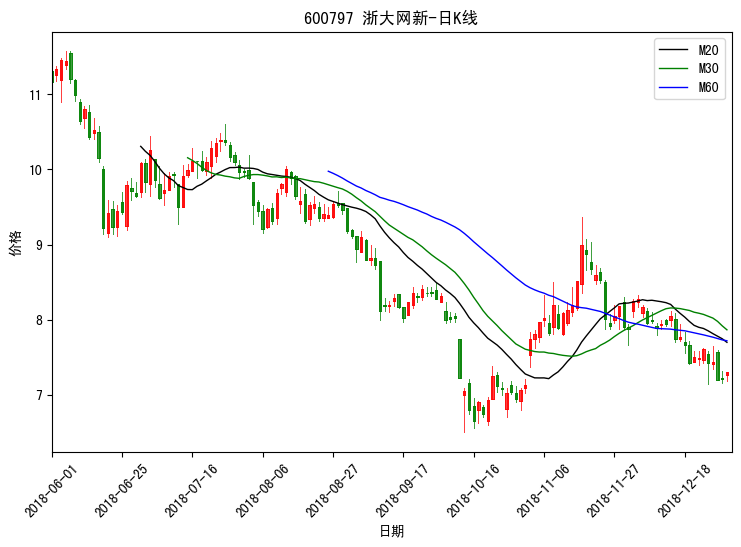

In [3]:
#绘制K线图+移动平均线
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
import mpl_finance as mpf #替换 import matplotlib.finance as mpf

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,6,1), datetime.datetime(2019,1,1))
print(df_stockload.info())

fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象
fig.subplots_adjust(left=0.09,bottom=0.20, right=0.94,top=0.90, wspace=0.2, hspace=0)
graph_KAV = fig.add_subplot(1, 1, 1)  # 创建子图

#绘制K线图
mpf.candlestick2_ochl(graph_KAV, df_stockload.Open, df_stockload.Close, df_stockload.High, df_stockload.Low, width=0.5,
                      colorup='r', colordown='g')  # 绘制K线走势

#绘制移动平均线图
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()#pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()#pd.rolling_mean(df_stockload.Close,window=60)

graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma60'],'blue',label='M60', lw=1.0)

graph_KAV.legend(loc='best')
graph_KAV.set_title(u"600797 浙大网新-日K线")
graph_KAV.set_xlabel("日期")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0, len(df_stockload.index))  # 设置一下x轴的范围
graph_KAV.set_xticks(range(0, len(df_stockload.index), 15))  # X轴刻度设定 每15天标一个日期
graph_KAV.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KAV.get_xticks()])  # 标签设置为日期

# X-轴每个ticker标签都向右倾斜45度
for label in graph_KAV.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)  # 设置标签字体
plt.show()

## 成交量可视化

In [8]:
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(2, 1, left=0.06, bottom=0.15, right=0.96, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])

In [9]:
graph_VOL.bar(np.arange(0, len(df_stockload.index)), df_stockload.Volume,color=['g' if df_stockload.Open[x] > df_stockload.Close[x] else 'r' for x in range(0,len(df_stockload.index))])

<BarContainer object of 145 artists>

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-06-01 to 2019-01-02
Data columns (total 6 columns):
High         145 non-null float64
Low          145 non-null float64
Open         145 non-null float64
Close        145 non-null float64
Volume       145 non-null float64
Adj Close    145 non-null float64
dtypes: float64(6)
memory usage: 7.9 KB
None


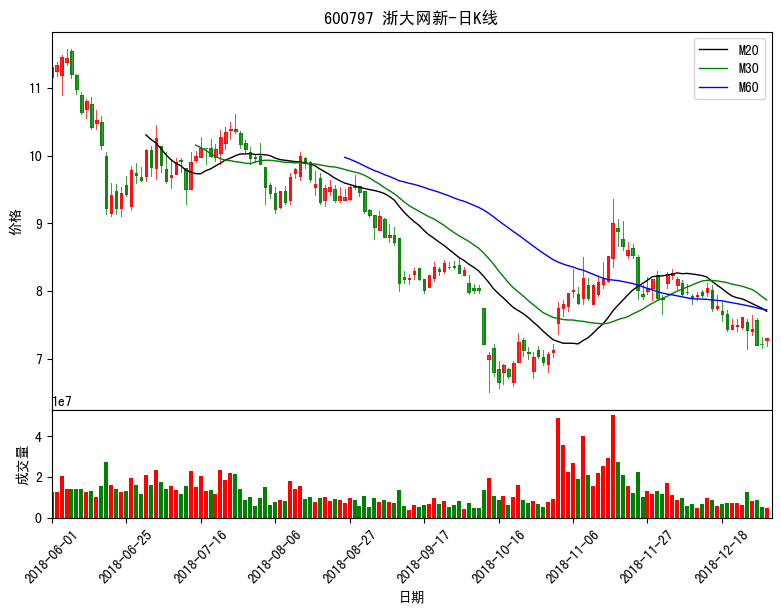

In [10]:
#绘制K线图+移动平均线+成交量
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec#分割子图
import pandas_datareader.data as web
import datetime
import mpl_finance as mpf #替换 import matplotlib.finance as mpf

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,6,1), datetime.datetime(2019,1,1))
print(df_stockload.info())

fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象

gs = gridspec.GridSpec(2, 1, left=0.06, bottom=0.15, right=0.96, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])

#绘制K线图
mpf.candlestick2_ochl(graph_KAV, df_stockload.Open, df_stockload.Close, df_stockload.High, df_stockload.Low, width=0.5,colorup='r', colordown='g')  # 绘制K线走势

#绘制移动平均线图
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()#pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()#pd.rolling_mean(df_stockload.Close,window=60)

graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma60'],'blue',label='M60', lw=1.0)

graph_KAV.legend(loc='best')
graph_KAV.set_title(u"600797 浙大网新-日K线")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0, len(df_stockload.index))  # 设置一下x轴的范围
graph_KAV.set_xticks(range(0, len(df_stockload.index), 15))  # X轴刻度设定 每15天标一个日期

#绘制成交量图
graph_VOL.bar(np.arange(0, len(df_stockload.index)), df_stockload.Volume,color=['g' if df_stockload.Open[x] > df_stockload.Close[x] else 'r' for x in range(0,len(df_stockload.index))])
graph_VOL.set_ylabel(u"成交量")
graph_VOL.set_xlabel("日期")
graph_VOL.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_VOL.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期
graph_VOL.set_xticklabels([df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_VOL.get_xticks()])#标签设置为日期

#X-轴每个ticker标签都向右倾斜45度
for label in graph_KAV.xaxis.get_ticklabels():
   label.set_visible(False)#隐藏标注 避免重叠

for label in graph_VOL.xaxis.get_ticklabels():
   label.set_rotation(45)
   label.set_fontsize(10)#设置标签字体

plt.show()

## MACD（异同移动平均线）可视化
MACD称为异同移动平均线，属于**趋势类指标**，

由**快速线DIF、慢速线DEA**组成。

在股票行情显示界面中，DIF和DEA是以零轴为中心轴，上下交叉移动的两条线，红绿柱状图BAR为辅助显示的指标。MACD计算方法如下所示：

DIF（差离值） = EMA（12日收盘价移动平均线）- EMA（26日收盘价移动平均线）

DEA（差离平均值） = DIF的9日移动平均线

BAR（柱状值） = 2 ×（DIF-DEA）

In [18]:
!pip install TA-Lib
import talib
macd_dif, macd_dea, macd_bar = talib.MACD(df_stockload['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
gs = gridspec.GridSpec(3, 1, left=0.05, bottom=0.15, right=0.96, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])
graph_MACD = fig.add_subplot(gs[2,:])
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dif, 'red', label='macd dif')  # dif    
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dea, 'blue', label='macd dea')  # dea 
# 绘制BAR>0 柱状图
bar_red = np.where(macd_bar > 0, 2 * macd_bar, 0)
# 绘制BAR<0 柱状图
bar_green = np.where(macd_bar < 0, 2 * macd_bar, 0)
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_red, facecolor='red')
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_green, facecolor='green')

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/


/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in greater
  # This is added back by InteractiveShellApp.init_path()
/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in less
  del sys.path[0]


<BarContainer object of 145 artists>

## KDJ可视化

In [19]:
df_stockload['K'], df_stockload['D'] = talib.STOCH(df_stockload.High.values, df_stockload.Low.values, df_stockload.Close.values,\
                                       fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

df_stockload['J'] = 3 * df_stockload['K'] - 2 * df_stockload['D']

In [20]:
gs = gridspec.GridSpec(4, 1, left=0.08, bottom=0.15, right=0.99, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1,1,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])
graph_MACD = fig.add_subplot(gs[2,:])
graph_KDJ = fig.add_subplot(gs[3,:])

In [21]:
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['K'], 'blue', label='K')  # K
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['D'], 'g--', label='D')  # D
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['J'], 'r-', label='J')  # J

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 145 entries, 2018-06-01 to 2019-01-02
Data columns (total 6 columns):
High         145 non-null float64
Low          145 non-null float64
Open         145 non-null float64
Close        145 non-null float64
Volume       145 non-null float64
Adj Close    145 non-null float64
dtypes: float64(6)
memory usage: 7.9 KB
None


/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/ipykernel_launcher.py:53: RuntimeWarning: invalid value encountered in greater
/Users/luzihang/.virtualenvs/tushare/lib/python3.7/site-packages/ipykernel_launcher.py:54: RuntimeWarning: invalid value encountered in less


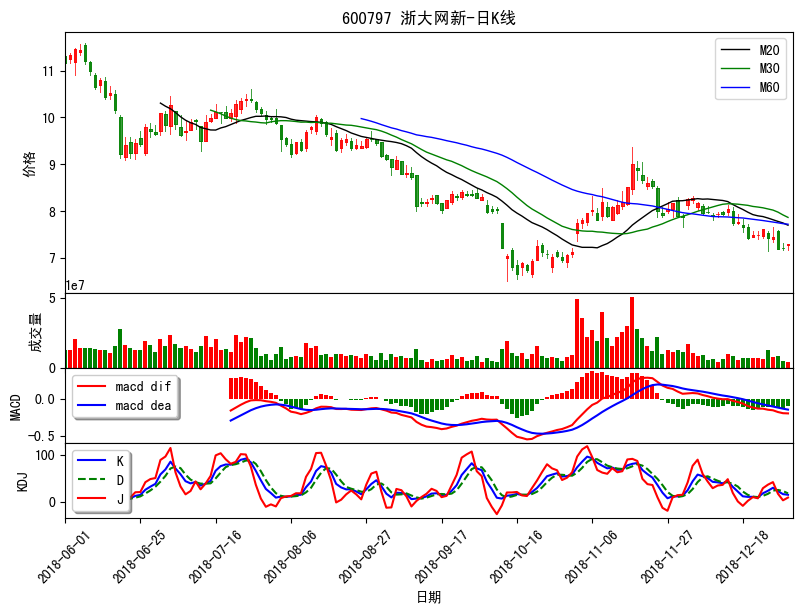

In [22]:
#绘制K线图+移动平均线+成交量+MACD+KDJ
import datetime
import talib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec#分割子图
import mpl_finance as mpf #替换 import matplotlib.finance as mpf
import pandas_datareader.data as web

plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

df_stockload = web.DataReader("600797.SS", "yahoo", datetime.datetime(2018,6,1), datetime.datetime(2019,1,1))
print(df_stockload.info())

fig = plt.figure(figsize=(8,6), dpi=100,facecolor="white")#创建fig对象

gs = gridspec.GridSpec(4, 1, left=0.08, bottom=0.15, right=0.99, top=0.96, wspace=None, hspace=0, height_ratios=[3.5,1,1,1])
graph_KAV = fig.add_subplot(gs[0,:])
graph_VOL = fig.add_subplot(gs[1,:])
graph_MACD = fig.add_subplot(gs[2,:])
graph_KDJ = fig.add_subplot(gs[3,:])

#绘制K线图
mpf.candlestick2_ochl(graph_KAV, df_stockload.Open, df_stockload.Close, df_stockload.High, df_stockload.Low, width=0.5,
                      colorup='r', colordown='g')  # 绘制K线走势

#绘制移动平均线图
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()#pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()#pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()#pd.rolling_mean(df_stockload.Close,window=60)

graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma20'],'black', label='M20',lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma30'],'green',label='M30', lw=1.0)
graph_KAV.plot(np.arange(0, len(df_stockload.index)), df_stockload['Ma60'],'blue',label='M60', lw=1.0)

graph_KAV.legend(loc='best')
graph_KAV.set_title(u"600797 浙大网新-日K线")
graph_KAV.set_ylabel(u"价格")
graph_KAV.set_xlim(0, len(df_stockload.index))  # 设置一下x轴的范围

#绘制成交量图
graph_VOL.bar(np.arange(0, len(df_stockload.index)), df_stockload.Volume,color=['g' if df_stockload.Open[x] > df_stockload.Close[x] else 'r' for x in range(0,len(df_stockload.index))])
graph_VOL.set_ylabel(u"成交量")
graph_VOL.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_VOL.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期

#绘制MACD
macd_dif, macd_dea, macd_bar = talib.MACD(df_stockload['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dif, 'red', label='macd dif')  # dif
graph_MACD.plot(np.arange(0, len(df_stockload.index)), macd_dea, 'blue', label='macd dea')  # dea

bar_red = np.where(macd_bar > 0, 2 * macd_bar, 0)# 绘制BAR>0 柱状图
bar_green = np.where(macd_bar < 0, 2 * macd_bar, 0)# 绘制BAR<0 柱状图
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_red, facecolor='red')
graph_MACD.bar(np.arange(0, len(df_stockload.index)), bar_green, facecolor='green')

graph_MACD.legend(loc='best',shadow=True, fontsize ='10')
graph_MACD.set_ylabel(u"MACD")
graph_MACD.set_xlim(0,len(df_stockload.index)) #设置一下x轴的范围
graph_MACD.set_xticks(range(0,len(df_stockload.index),15))#X轴刻度设定 每15天标一个日期

#绘制KDJ
df_stockload['K'], df_stockload['D'] = talib.STOCH(df_stockload.High.values, df_stockload.Low.values, df_stockload.Close.values,\
                                       fastk_period=9, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)

df_stockload['J'] = 3 * df_stockload['K'] - 2 * df_stockload['D']

graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['K'], 'blue', label='K')  # K
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['D'], 'g--', label='D')  # D
graph_KDJ.plot(np.arange(0, len(df_stockload.index)), df_stockload['J'], 'r-', label='J')  # J
graph_KDJ.legend(loc='best', shadow=True, fontsize='10')

graph_KDJ.set_ylabel(u"KDJ")
graph_KDJ.set_xlabel("日期")
graph_KDJ.set_xlim(0, len(df_stockload.index))  # 设置一下x轴的范围
graph_KDJ.set_xticks(range(0, len(df_stockload.index), 15))  # X轴刻度设定 每15天标一个日期
graph_KDJ.set_xticklabels(
    [df_stockload.index.strftime('%Y-%m-%d')[index] for index in graph_KDJ.get_xticks()])  # 标签设置为日期

# X-轴每个ticker标签都向右倾斜45度
for label in graph_KAV.xaxis.get_ticklabels():
    label.set_visible(False)

for label in graph_VOL.xaxis.get_ticklabels():
    label.set_visible(False)

for label in graph_MACD.xaxis.get_ticklabels():
    label.set_visible(False)

for label in graph_KDJ.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)  # 设置标签字体
plt.show()

# 股票数据可视化：pyecharts实现Web版股票行情界面

## Kline方法绘制K线图

In [2]:
from pyecharts import Kline
import pandas_datareader.data as web
import datetime
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
kline = Kline("行情显示图")
# 数据转换
ohlc = list(zip(df_stockload.Open,df_stockload.Close,df_stockload.Low,df_stockload.High))
dates = df_stockload.index.strftime('%Y-%m-%d')

kline.add("日K", dates, ohlc, is_datazoom_show=True,\
        mark_line=["max"], mark_point=["max"], xaxis_rotate=30, yaxis_min=0.9*min(df_stockload["Low"]))

kline.show_config()
kline.render(r'k.html')

function kline_tooltip_formatter(params) {
    var text;
    text = ((((((((((((params[0].seriesName + "<br/>") + "- open:") + params[0].data[1]) + "<br/>") + "- close:") + params[0].data[2]) + "<br/>") + "- lowest:") + params[0].data[3]) + "<br/>") + "- highest:") + params[0].data[4]);
    return text;
}

{
    "title": [
        {
            "text": "\u884c\u60c5\u663e\u793a\u56fe",
            "left": "auto",
            "top": "auto",
            "textStyle": {
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "dataView": {
       

In [3]:
from pyecharts import Line
import pandas_datareader.data as web
import datetime
# example1 Line
line = Line("移动平均线图示例")

df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.date.today())
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()  # pd.rolling_mean(df_stockload.Close,window=20)
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()  # pd.rolling_mean(df_stockload.Close,window=30)
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()  # pd.rolling_mean(df_stockload.Close,window=60)

dates = df_stockload.index.strftime('%Y-%m-%d')

indic_name_list = ['Ma20','Ma30','Ma60']
for indic_ma in indic_name_list:
      line.add(indic_ma, dates, df_stockload[indic_ma].tolist(),is_smooth=True,yaxis_min=0.9*min(df_stockload["Low"]))#is_smooth 平滑曲线显示

line.show_config()
line.render(r'average.html')

function kline_tooltip_formatter(params) {
    var text;
    text = ((((((((((((params[0].seriesName + "<br/>") + "- open:") + params[0].data[1]) + "<br/>") + "- close:") + params[0].data[2]) + "<br/>") + "- lowest:") + params[0].data[3]) + "<br/>") + "- highest:") + params[0].data[4]);
    return text;
}

{
    "title": [
        {
            "text": "\u79fb\u52a8\u5e73\u5747\u7ebf\u56fe\u793a\u4f8b",
            "left": "auto",
            "top": "auto",
            "textStyle": {
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "da

## Bar方法绘制成交量

In [4]:
from pyecharts import Bar
import pandas_datareader.data as web
import datetime

# example1 Bar
bar = Bar('柱状图表渲染', '成交量显示')

df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.datetime(2019, 1, 1))
# 数据转换
dates = df_stockload.index.strftime('%Y-%m-%d')

volume_rise=[df_stockload.Volume[x] if df_stockload.Close[x] > df_stockload.Open[x] else "0" for x in range(0, len(df_stockload.index))]
volume_drop=[df_stockload.Volume[x] if df_stockload.Close[x] <= df_stockload.Open[x] else "0" for x in range(0, len(df_stockload.index))]

bar.add("rvolume", dates, volume_rise, is_stack=True, label_color=["#218868"], is_datazoom_show=True)
bar.add("dvolume", dates, volume_drop, is_stack=True, label_color=["#FA8072"], is_datazoom_show=True)

bar.show_config()
bar.render(r'volume.html')#渲染图表，指定生成volume.html文件


{
    "title": [
        {
            "text": "\u67f1\u72b6\u56fe\u8868\u6e32\u67d3",
            "subtext": "\u6210\u4ea4\u91cf\u663e\u793a",
            "left": "auto",
            "top": "auto",
            "textStyle": {
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "dataView": {
                "show": true,
                "title": "data view"
            }
        }
    },
    "series_id": 3301719,
    "tooltip": {
        "trigger": "item",
        "triggerOn": "mousemove|click",
        "axisPointer": {
            "type"

## EffectScatter方法绘制买卖点

In [5]:
from pyecharts import EffectScatter
# example1 EffectScatter
es = EffectScatter("动态散点图示例")
#带有涟漪特效动画的散点图
es.add("buy signal", [10],[10],symbol_size=20,effect_scale=3.5,effect_period=3,symbol="pin")
es.add("buy signal", [30],[30],symbol_size=30,effect_scale=5.5,effect_period=5,symbol="roundRect")
es.add("sell signal", [20],[20],symbol_size=12,effect_scale=4.5,effect_period=4,symbol="rect")
es.add("sell signal", [50],[50],symbol_size=16,effect_scale=5.5,effect_period=3,symbol="arrow")

es.show_config()
es.render(r'signal.html')


{
    "title": [
        {
            "text": "\u52a8\u6001\u6563\u70b9\u56fe\u793a\u4f8b",
            "left": "auto",
            "top": "auto",
            "textStyle": {
                "fontSize": 18
            },
            "subtextStyle": {
                "fontSize": 12
            }
        }
    ],
    "toolbox": {
        "show": true,
        "orient": "vertical",
        "left": "95%",
        "top": "center",
        "feature": {
            "saveAsImage": {
                "show": true,
                "title": "save as image"
            },
            "restore": {
                "show": true,
                "title": "restore"
            },
            "dataView": {
                "show": true,
                "title": "data view"
            }
        }
    },
    "series_id": 2845324,
    "tooltip": {
        "trigger": "item",
        "triggerOn": "mousemove|click",
        "axisPointer": {
            "type": "line"
        },
        "textStyle": {
        

## 技术指标在图表上的集成

In [6]:
#Overlap+Grid方法绘制交易行情界面
import pandas_datareader.data as web
import datetime
from pyecharts import Grid,Overlap,Line,Bar,EffectScatter,Kline
# example1 senior quotations
df_stockload = web.DataReader("000001.SS", "yahoo", datetime.datetime(2018, 1, 1), datetime.date.today())
df_stockload['Ma20'] = df_stockload.Close.rolling(window=20).mean()  
df_stockload['Ma30'] = df_stockload.Close.rolling(window=30).mean()  
df_stockload['Ma60'] = df_stockload.Close.rolling(window=60).mean()  

# python3.7打印
print(df_stockload.tail())  # 查看前几行
print(df_stockload.columns)  # 查看列名
print(df_stockload.index)  # 查看索引
print(df_stockload.describe())  # 查看各列数据描述性统计

kline = Kline("行情显示图",title_pos="40%")
ohlc = list(zip(df_stockload.Open,df_stockload.Close,df_stockload.Low,df_stockload.High))
dates = df_stockload.index.strftime('%Y-%m-%d')
print(type(dates))
print(type(df_stockload.index))

#is_datazoom_show=True 图表数据缩放  指定 markLine 位于开盘或者收盘上
kline.add("日K", dates, ohlc, is_datazoom_show=True,is_xaxis_show=False, \
        legend_pos="85%",legend_orient="vertical",legend_top="45%",mark_line=["max"], mark_point=["max"])
line = Line()
indic_name_list = ['Ma20','Ma30','Ma60']
for indic_ma in indic_name_list:
      line.add(indic_ma, dates, df_stockload[indic_ma].tolist(),is_smooth=True)

bar = Bar()

volume_rise=[df_stockload.Volume[x] if df_stockload.Close[x] > df_stockload.Open[x] else "0" for x in range(0, len(df_stockload.index))]
volume_drop=[df_stockload.Volume[x] if df_stockload.Close[x] <= df_stockload.Open[x] else "0" for x in range(0, len(df_stockload.index))]
#is_yaxis_show=True 显示y坐标轴
#datazoom_xaxis_index=[0, 1] 设置dataZoom控制索引为 0,1两个x 轴
bar.add("rvolume", dates, volume_rise, is_stack=True)
bar.add("dvolume", dates, volume_drop, is_stack=True,legend_pos="85%",legend_orient="vertical",legend_top="30%", \
        is_datazoom_show=True,tooltip_tragger="axis", is_legend_show=True, is_yaxis_show=True, datazoom_xaxis_index=[0, 1])

# buy and sell
v1 = dates[50] 
v2 = df_stockload['Low'].iloc[50]
es = EffectScatter("buy")
es.add("buy", [v1], [v2])
v1 = dates[88]
v2 = df_stockload['High'].iloc[88]
es.add( "sell", [v1], [v2], symbol="pin",)

overlap = Overlap()
overlap.add(kline)
overlap.add(line)
overlap.add(es)
grid = Grid()
grid.add(bar, grid_top="70%",grid_right="15%")
grid.add(overlap, grid_bottom="30%",grid_right="15%")
grid.show_config()
grid.render(r'total.html')

                   High          Low         Open        Close        Volume  \
Date                                                                           
2020-01-08  3094.239014  3059.131104  3094.239014  3066.893066  2.979000e+05   
2020-01-09  3097.329102  3080.131104  3082.639893  3094.882080  2.434000e+05   
2020-01-10  3105.225098  3081.395996  3102.293945  3092.291016  2.104000e+05   
2020-01-13  3115.570068  3075.384033  3091.492920  3115.570068  2.106000e+05   
2020-01-14  3127.169189  3105.604980  3120.666992  3106.820312  1.522540e+09   

              Adj Close         Ma20         Ma30         Ma60  
Date                                                            
2020-01-08  3066.893066  3010.392139  2971.478426  2956.516382  
2020-01-09  3094.882080  3019.270447  2977.739160  2958.246916  
2020-01-10  3092.291016  3027.664148  2984.042529  2960.139933  
2020-01-13  3115.570068  3037.657751  2991.571761  2962.443933  
2020-01-14  3106.820312  3044.614966  2999.399772